In [97]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\EzgiOzgen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EzgiOzgen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')
stop_word_list

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [99]:
dataset = pd.read_excel('sentiment_analysis.xlsx' , sheet_name = 'Sheet1')

In [100]:
dataset

,Text,Sentiment
0,bana beklediğim cevapları vermiyorsun,0
1,senden istediğim cevaplar bunlar değil,0
2,verdiğin yanıtlar doğru değil,0
3,duymak istediğim cevaplar bunlar değil,0
4,seni seviyorum bro,1
...,...,...
19018,J7 Pro Cihazı Geldi Fakat Faturası Gelmedi!,0
19019,Müşteri Hizmetlerine Ulaşamama Sorunu!,0
19020,Para İadesi Sorunu!,0
19021,Mağdur Ediyor!,0


In [101]:
dataset['Text'] = dataset['Text'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
dataset['Text'] = dataset['Text'].apply(lambda x: x.lower())
dataset['Text'] = dataset['Text'].apply(lambda x: x.strip())

def token(values):
    words = nltk.tokenize.word_tokenize(values)
    filtered_words = [word for word in words if word not in stop_word_list]
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc

dataset['Text'] = dataset['Text'].apply(lambda x: token(x))

In [102]:
dataset['Text']

0             bana beklediğim cevapları vermiyorsun
1            senden istediğim cevaplar bunlar değil
2                     verdiğin yanıtlar doğru değil
3            duymak istediğim cevaplar bunlar değil
4                                seni seviyorum bro
                            ...                    
19018    j7 pro cihazı geldi fakat faturası gelmedi
19019         müşteri hizmetlerine ulaşamama sorunu
19020                           para i̇adesi sorunu
19021                                 mağdur ediyor
19022        ürünü aldığı halde parayı i̇ade etmedi
Name: Text, Length: 19023, dtype: object

In [103]:
data = dataset['Text'].values.tolist()
sentiment = dataset['Sentiment'].values.tolist()

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,sentiment,test_size = 0.2, random_state = 42)

In [105]:
x_train[300]

'fiyata iyi süper'

In [106]:
y_train[300]

1

In [107]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(data)
tokenizer.word_index

{'bir': 1,
 'ürün': 2,
 'iyi': 3,
 'güzel': 4,
 'tavsiye': 5,
 'gayet': 6,
 'ederim': 7,
 'hızlı': 8,
 'aldım': 9,
 'yok': 10,
 'telefon': 11,
 'olarak': 12,
 'ürünü': 13,
 'göre': 14,
 'kadar': 15,
 '2': 16,
 'var': 17,
 'teşekkürler': 18,
 'elime': 19,
 'fiyat': 20,
 'uygun': 21,
 'kullanışlı': 22,
 'fiyata': 23,
 'ben': 24,
 'gün': 25,
 'değil': 26,
 'kargo': 27,
 'biraz': 28,
 '1': 29,
 'kaliteli': 30,
 'kullanıyorum': 31,
 'kalitesi': 32,
 'geldi': 33,
 'gerçekten': 34,
 'tek': 35,
 'şarj': 36,
 '3': 37,
 'sonra': 38,
 'bi': 39,
 'olması': 40,
 'cok': 41,
 'bence': 42,
 'küçük': 43,
 'kesinlikle': 44,
 'önce': 45,
 'tam': 46,
 'oldu': 47,
 'performans': 48,
 'ses': 49,
 'ulaştı': 50,
 'mükemmel': 51,
 'sorun': 52,
 'fakat': 53,
 'oldukça': 54,
 'fazla': 55,
 'ancak': 56,
 'bile': 57,
 'fiyatına': 58,
 'memnun': 59,
 'hepsiburada': 60,
 'başarılı': 61,
 'şık': 62,
 'fiyatı': 63,
 'uzun': 64,
 'telefonu': 65,
 'memnunum': 66,
 'hızı': 67,
 'ayrıca': 68,
 'sipariş': 69,
 'kolay': 70,

In [108]:
#her bir yorumu aynı boyuta getirmek gerekiyor RNN böyle çalışıyor.
x_train_tokens = tokenizer.texts_to_sequences(x_train)
x_test_tokens = tokenizer.texts_to_sequences(x_test)

In [109]:
x_train_tokens[300]

[23, 3, 75]

In [110]:
x_train[300]

'fiyata iyi süper'

In [111]:
#her bir yorumun uzunluğu alınır ve bir liste oluşturulur ve numpy array olarak çevrilir.
num_tokens = [len(tokens) for tokens in x_train_tokens + x_test_tokens]
num_tokens = np.array(num_tokens)

In [112]:
np.mean(num_tokens)

16.413867423645062

In [113]:
np.max(num_tokens)

235

In [114]:
#burada token sayısı ayarlanırken ortalam etrafındaki dikkate alınarak bir sayı belirlenir
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

52

In [115]:
#belirlenen bu sayı verinin yüzde kaçını kapsadığına bakılır.
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9599432266204069

In [116]:
#veriler belirlenen token sayısına göre ayarlanır
x_train_pad = pad_sequences(x_train_tokens, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_tokens, maxlen=max_tokens)

In [117]:
x_train_pad[3027]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  545,   10, 1834,   15, 9899, 3943,  228, 1817,  195,
        112, 6740,  179,  690,  644,   55,   10, 2689])

In [118]:
x_test_pad[2000]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    2,   49,   32,   58,   14,   61,   45, 5249,
        532,  194,  183,  687, 3116,   56,    3,  123])

In [119]:
#tokenlaştırılan kelimeler tekrar string hale geitirilmek için bir fonksiyon yazılması gerekiyor.
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

#tokenlaştırılan cümleyi tekrar string hale getirmek
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [274]:
#ardışık bir model
model = Sequential()

#her kelimeye karşılık gelen 50 uzunluğunda bir vektör oluşturulur. (Embedding matrisi)
embedding_size = 50

#matris kelime sayısı ve embedding büyüklüğünde olacak, yani 10bine 50 uzunluğunda. Buna da bir isim veriliyor name değişkeniyle.
model.add(Embedding(input_dim=10000,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))

In [275]:
#LSTM layerlerinin eklenmesi
## 16 nöronlu LSTM (16 outputlu , return_sequences=True demek output'un tamamını ver demek)
model.add(LSTM(units=16, return_sequences=True))
## 8 nöronlu LSTM (8 outputlu , return_sequences=True demek output'un tamamını ver demek)
model.add(LSTM(units=8, return_sequences=True))
## 4 nöronlu LSTM (4 outputlu , return_sequences=False yani default değer, tek bir output verecek)
model.add(LSTM(units=4))
## output layer'ı , görsel olarak gösterilirken dense layer kullanılır.  Tek bir nörondan oluştuğu için 1 yazılır.
model.add(Dense(1, activation='sigmoid'))

In [276]:
#optimizasyon algoritması, 1e-3 = 0.001 demek.
optimizer = Adam(lr=1e-3)

C:\Users\EzgiOzgen\.conda\envs\tensorflow-sessions\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [277]:
#modeli derlemek, loss fonksiyonu binary_crossentropy -> sadece 2 sınıf ama daha fazla sınıflar için categorical_crossentropy kullanılır.
#metrics -> modelin başarısını görmek için.
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [278]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 52, 50)           500000    
                                                                 
 lstm_18 (LSTM)              (None, 52, 16)            4288      
                                                                 
 lstm_19 (LSTM)              (None, 52, 8)             800       
                                                                 
 lstm_20 (LSTM)              (None, 4)                 208       
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 505,301
Trainable params: 505,301
Non-trainable params: 0
_________________________________________________________________


In [279]:
#model eğitimi, bir defa eğitimden geçmesi -> epoch , batch_size -> 256'şar 256'şar beslenecek.
history = model.fit(np.array(x_train_pad), np.array(y_train),validation_split=0.25, epochs=28, batch_size=256)

Epoch 1/28
45/45 [==============================] - 11s 114ms/step - loss: 0.6218 - accuracy: 0.7169 - val_loss: 0.5928 - val_accuracy: 0.7180
Epoch 2/28
45/45 [==============================] - 5s 101ms/step - loss: 0.5589 - accuracy: 0.7229 - val_loss: 0.4999 - val_accuracy: 0.7848
Epoch 3/28
45/45 [==============================] - 5s 112ms/step - loss: 0.4314 - accuracy: 0.8434 - val_loss: 0.3518 - val_accuracy: 0.8959
Epoch 4/28
45/45 [==============================] - 4s 89ms/step - loss: 0.2811 - accuracy: 0.9237 - val_loss: 0.2953 - val_accuracy: 0.9009
Epoch 5/28
45/45 [==============================] - 4s 89ms/step - loss: 0.2064 - accuracy: 0.9517 - val_loss: 0.2586 - val_accuracy: 0.9191
Epoch 6/28
45/45 [==============================] - 5s 110ms/step - loss: 0.1550 - accuracy: 0.9720 - val_loss: 0.2472 - val_accuracy: 0.9230
Epoch 7/28
45/45 [==============================] - 5s 103ms/step - loss: 0.1226 - accuracy: 0.9784 - val_loss: 0.2478 - val_accuracy: 0.9185
Epoch 8

In [280]:
model.save("sentiment_model.h5")

In [281]:
#test edip çıkan sonuçları result değişkenine atıyoruz.
result = model.evaluate(np.array(x_test_pad),np.array(y_test))

119/119 [==============================] - 2s 17ms/step - loss: 0.3408 - accuracy: 0.9162


In [282]:
result[1]

0.9161629676818848

In [283]:
y_pred = (model.predict(x=x_test_pad[:700]) >0.5).astype('int32')

In [284]:
y_pred = y_pred.T[0]

In [285]:
y_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [286]:
text = "AMAN TANRIM BU ÜRÜN Bİ HARİKA THANK YOU (BY MI)"
texts = [text]
tokens = tokenizer.texts_to_sequences(texts)
print(tokens)

[[1667, 2, 1932, 2178, 6518, 7608, 142]]


In [287]:
tokens_pad = pad_sequences(tokens,maxlen = max_tokens)
tokens_pad.shape

(1, 52)

In [288]:
print("moralinizin {} olduğunu görüyorum. ".format(model.predict(tokens_pad).astype("int32")))

moralinizin [[0]] olduğunu görüyorum. 


In [300]:
df.iloc[13][0]
list(df.columns)
df.head()

,yorum,Positivity;
0,Yorum yapan arkadaşları gerçek den anlayamıyor...,0;
1,yazılım olarak abuk subuk ufak hatalar dolu ve...,0;
2,1 aydır kullanıyorum ön kamerası berbat arka k...,0;
3,Bundan önce Lenovo k6 power kullandım ve şarjı...,0;
4,Bu fiyat bandında alınabilecek bir telefon. Am...,0;


In [310]:
df = pd.read_csv("data2.csv")
test = []
for i in range(len(df)):
    test.append(df.iloc[i][0])
    tokens = tokenizer.texts_to_sequences(test)
tokens_pad = pad_sequences(tokens,maxlen = max_tokens)
a = ((model.predict(tokens_pad) >0.5).astype('int32'))
a.shape

(540, 1)

In [312]:
df2 = pd.DataFrame(a, 
             columns=['Positivity'])
df2.head()

,Positivity
0,1
1,1
2,1
3,1
4,1


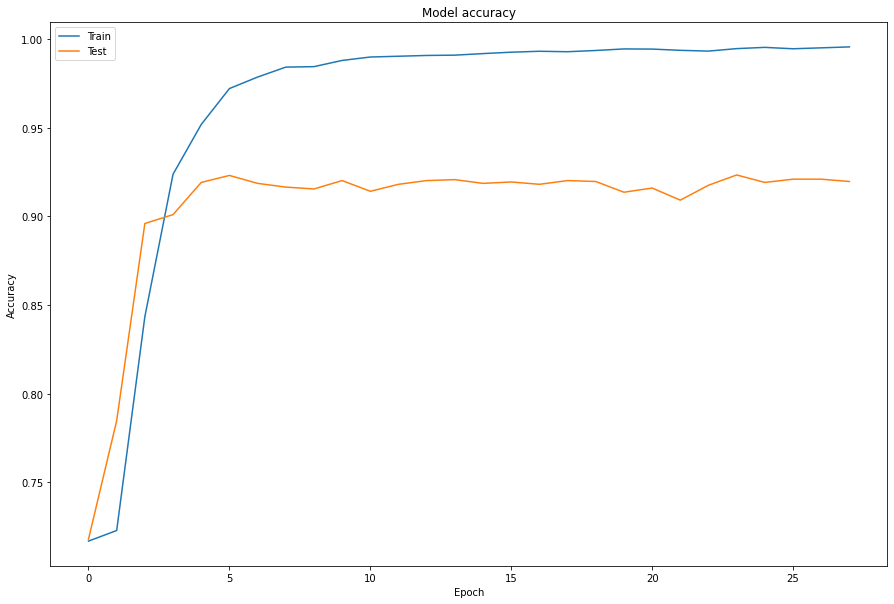

In [291]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

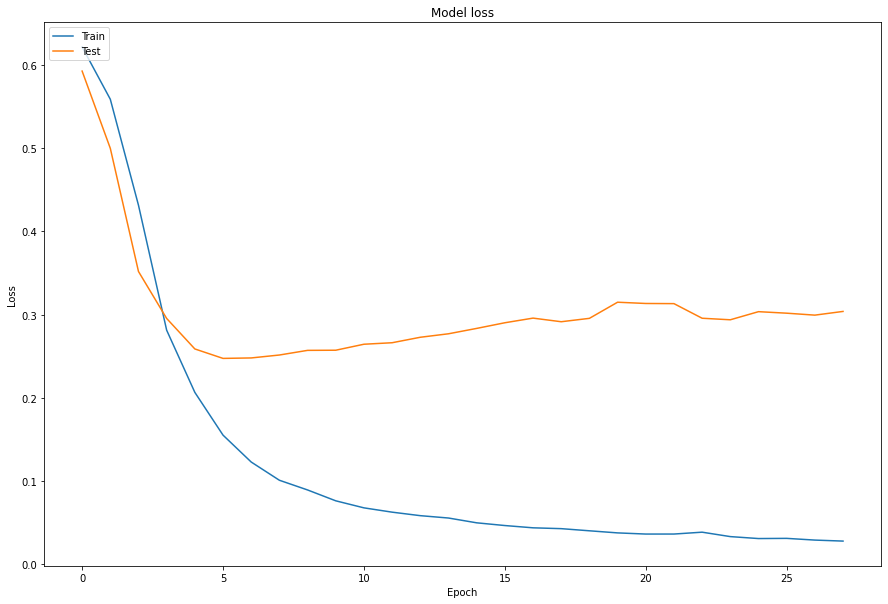

In [292]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [295]:
!pip install textblob
!pip install tweepy
from textblob import TextBlob
import tweepy

     -------------------------------------- 66.0/66.0 KB 715.1 kB/s eta 0:00:00


In [315]:
negative_list = df2[df2['Positivity'] == 0]
positive_list = df2[df2['Positivity'] == 1]

print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))

print()

print("% of positive: ",100*len(positive_list)/len(tweet_list))
print("% of negative: ",100*len(negative_list)/len(tweet_list))

total number:  540
positive number:  433
negative number:  107

% of positive:  80.18518518518519
% of negative:  19.814814814814813


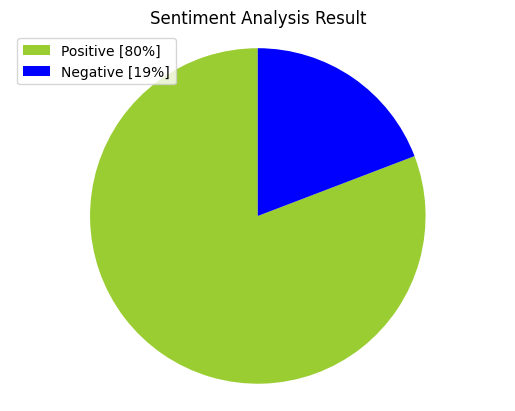

In [316]:
import matplotlib.pyplot as plt

positive = int(100*len(positive_list)/len(tweet_list))
negative = int(100*len(negative_list)/len(tweet_list))

labels = ['Positive ['+str(positive)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, negative]
colors = ['yellowgreen', 'blue']
patches, texts = plt.pie(sizes,colors=colors, startangle=90, radius=50)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis("equal")
plt.show()

In [317]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [319]:
common_words = get_top_n_words(df['yorum'], 20)
common_df = pd.DataFrame(common_words, columns = ['yorum', 'count'])
common_df.head()

,yorum,count
0,çok,271
1,bir,262
2,telefon,252
3,ve,211
4,güzel,171


<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

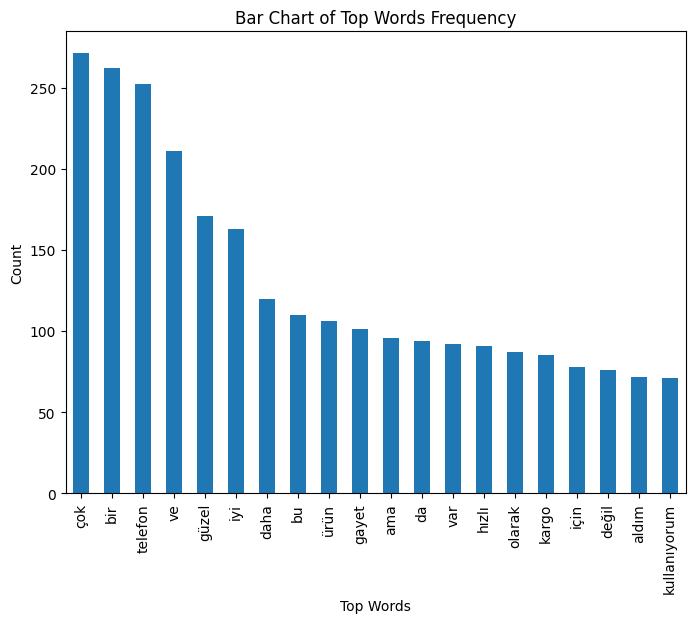

In [321]:
common_df.groupby('yorum').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency")

In [322]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words2 = get_top_n_bigram(df['yorum'], 30)

In [323]:
top_bigram = pd.DataFrame(common_words2, columns=['yorum', "Count"])
top_bigram.head()

,yorum,Count
0,çok iyi,72
1,bir telefon,60
2,gayet güzel,45
3,fiyat performans,45
4,benim için,38


<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

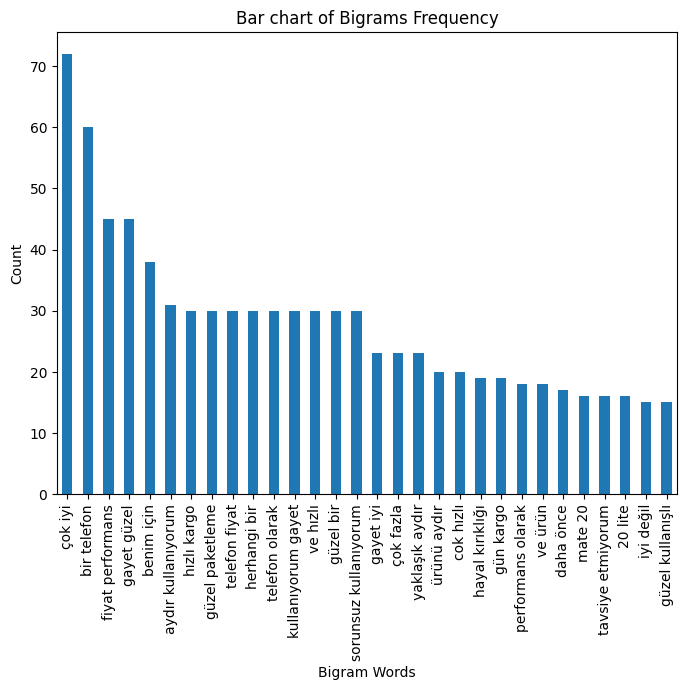

In [325]:
top_bigram.groupby('yorum').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency")

In [326]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words3 = get_top_n_trigram(df['yorum'], 30)
top_trigram = pd.DataFrame(common_words3, columns = ['yorum' , 'Count'])
top_trigram.head(5)

,yorum,Count
0,güzel bir telefon,30
1,telefon fiyat performans,30
2,yaklaşık aydır kullanıyorum,23
3,mate 20 lite,16
4,aydır kullanıyorum gayet,15


In [329]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

def creat_wordcloud(tweets):
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    # iterate through the csv file
    for val in tweets:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1200, height = 800,
                    background_color ='white',
                    max_words=3000,
                    stopwords = stopwords,
                    min_font_size = 10,
                    repeat = True).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

     ------------------------------------ 155.9/155.9 KB 582.8 kB/s eta 0:00:00


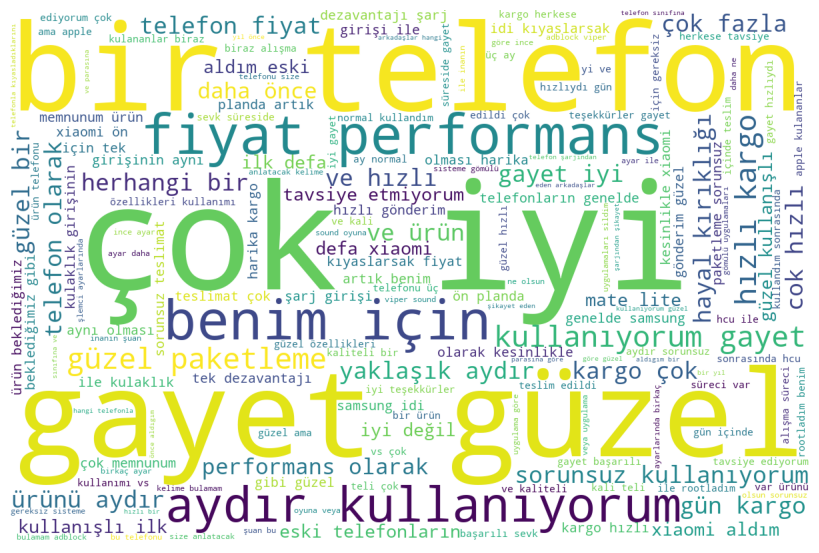

In [330]:
# All Tweets
creat_wordcloud(df['yorum'].values)

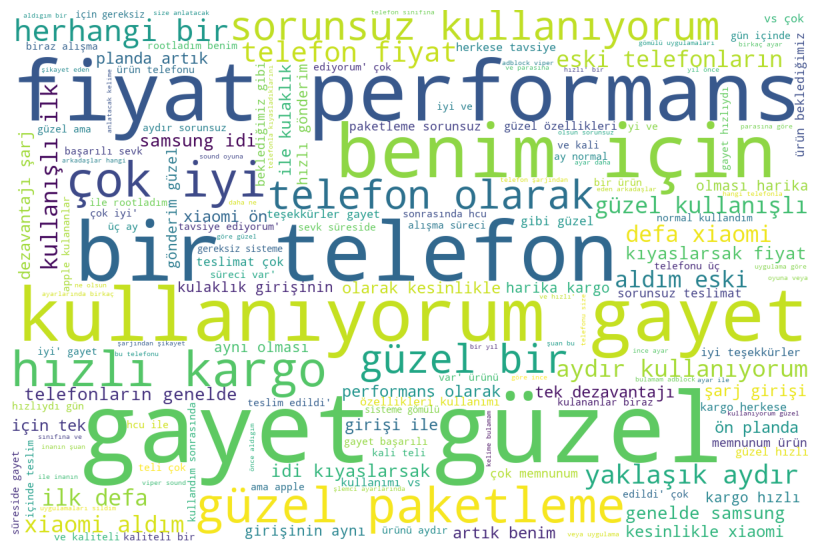

In [331]:
# Positive Tweets
creat_wordcloud(df[df['Positivity;'] == '1;'].values)

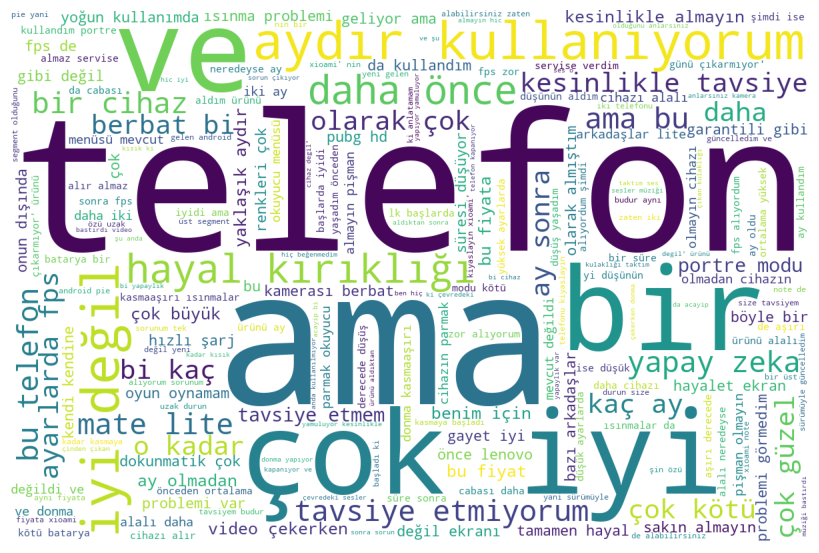

In [332]:
# Negative Tweets
creat_wordcloud(df[df['Positivity;'] == '0;'].values)

In [ ]:
8